In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [54]:
dataset=pd.read_csv('Downloads/House_pred_train.csv')

In [56]:
dataset

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenull,MasVnrAreanull,GarageYrBltnull
0,1,12.247694,0.235294,1.0,0.418208,0.366344,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.00,1.00,0.5,0.122500,0.5,1.0,1.0,0.5,1.0,0.0,1.00,0.125089,1.0,0.000000,0.064212,0.140098,1.0,1.000000,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.5,0.500000,1.0,0.000000,0.000000,1.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.090909,0.50,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,1.0,0.495064,0.391317,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,1.0,0.666667,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.25,0.25,0.0,0.000000,0.0,1.0,0.5,0.5,1.0,0.5,0.50,0.173281,1.0,0.000000,0.121575,0.206547,1.0,1.000000,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.0,0.333333,1.0,0.333333,0.666667,1.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.363636,0.25,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.00,1.00,0.5,0.101250,0.5,1.0,1.0,0.5,1.0,0.5,1.00,0.086109,1.0,0.000000,0.185788,0.150573,1.0,1.000000,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.5,0.333333,1.0,0.333333,0.666667,1.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.727273,0.50,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.5,0.0,1.0,0.5,0.0,0.5,1.0,1.0,1.0,1.000000,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.00,0.75,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.50,0.038271,1.0,0.000000,0.231164,0.123732,1.0,0.666667,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.5,0.416667,1.0,0.333333,1.000000,0.0,0.074766,0.333333,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,0.090909,0.00,0.0,1.0,0.0,0.0,0.0
4,5,12.429216,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.5,0.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.000000,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.00,1.00,0.5,0.218750,0.5,1.0,1.0,0.5,1.0,1.0,1.00,0.116052,1.0,0.000000,0.209760,0.187398,1.0,1.000000,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.5,0.583333,1.0,0.333333,0.666667,1.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.00000,1.000000,0.50,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,1.0,0.400718,0.353592,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0,1.000000,0.555556,0.500,0.058824,0.131148,0.0,0.0,1.00,1.00,0.0,0.000000,0.0,1.0,1.0,0.5,1.0,0.0,0.75,0.000000,1.0,0.000000,0.407962,0.155974,1.0,1.000000,1.0,1.0

In [58]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

In [60]:
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

### Apply Feature Selection
# first, I specify the Lasso Regression model, and select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.
# Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero

In [62]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [64]:
feature_sel_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [66]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


total features: 82
selected features: 28
features with coefficients shrank to zero: 54


In [68]:
selected_feat

Index(['MSZoning', 'LotShape', 'Condition1', 'BldgType', 'OverallQual',
       'YearRemodAdd', 'RoofStyle', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageCond', 'PavedDrive'],
      dtype='object')

In [70]:
X_train=X_train[selected_feat]

In [72]:
X_train.head()

,MSZoning,LotShape,Condition1,BldgType,OverallQual,YearRemodAdd,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive
0,1.0,0.0,1.0,1.0,0.666667,0.098361,0.0,0.5,0.5,1.0,0.5,1.0,0.0,1.000000,1.0,0.356155,0.577712,0.333333,0.666667,0.5,1.0,0.000000,0.000000,1.0,0.666667,0.50,1.0,1.0
1,1.0,0.0,0.0,1.0,0.555556,0.524590,0.0,0.0,0.0,0.5,0.5,1.0,0.5,1.000000,1.0,0.503056,0.470245,0.000000,0.666667,0.0,1.0,0.333333,0.666667,1.0,0.666667,0.50,1.0,1.0
2,1.0,0.5,1.0,1.0,0.666667,0.114754,0.0,0.5,0.5,1.0,0.5,1.0,0.5,1.000000,1.0,0.383441,0.593095,0.333333,0.666667,0.5,1.0,0.333333,0.666667,1.0,0.666667,0.50,1.0,1.0
3,1.0,0.5,1.0,1.0,0.666667,0.606557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.399941,0.579157,0.333333,0.333333,0.5,1.0,0.333333,1.000000,0.0,0.333333,0.75,1.0,1.0
4,1.0,0.5,1.0,1.0,0.777778,0.147541,0.0,0.5,0.5,1.0,0.5,1.0,1.0,1.000000,1.0,0.466237,0.666523,0.333333,0.666667,0.5,1.0,0.333333,0.666667,1.0,0.666667,0.75,1.0,1.0


In [74]:
data=pd.concat([X_train,y_train],axis=1)

In [76]:
data

,MSZoning,LotShape,Condition1,BldgType,OverallQual,YearRemodAdd,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive,SalePrice
0,1.0,0.0,1.0,1.0,0.666667,0.098361,0.0,0.5,0.5,1.0,0.5,1.0,0.0,1.000000,1.0,0.356155,0.577712,0.333333,0.666667,0.5,1.0,0.000000,0.000000,1.0,0.666667,0.50,1.0,1.0,12.247694
1,1.0,0.0,0.0,1.0,0.555556,0.524590,0.0,0.0,0.0,0.5,0.5,1.0,0.5,1.000000,1.0,0.503056,0.470245,0.000000,0.666667,0.0,1.0,0.333333,0.666667,1.0,0.666667,0.50,1.0,1.0,12.109011
2,1.0,0.5,1.0,1.0,0.666667,0.114754,0.0,0.5,0.5,1.0,0.5,1.0,0.5,1.000000,1.0,0.383441,0.593095,0.333333,0.666667,0.5,1.0,0.333333,0.666667,1.0,0.666667,0.50,1.0,1.0,12.317167
3,1.0,0.5,1.0,1.0,0.666667,0.606557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,1.0,0.399941,0.579157,0.333333,0.333333,0.5,1.0,0.333333,1.000000,0.0,0.333333,0.75,1.0,1.0,11.849398
4,1.0,0.5,1.0,1.0,0.777778,0.147541,0.0,0.5,0.5,1.0,0.5,1.0,1.0,1.000000,1.0,0.466237,0.666523,0.333333,0.666667,0.5,1.0,0.333333,0.666667,1.0,0.666667,0.75,1.0,1.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.0,1.0,1.0,0.555556,0.131148,0.0,0.0,0.0,1.0,0.5,1.0,0.0,1.000000,1.0,0.396777,0.564433,0.000000,0.666667,0.0,1.0,0.333333,0.666667,1.0,0.666667,0.50,1.0,1.0,12.072541
1456,1.0,0.0,1.0,1.0,0.555556,0.377049,0.0,1.0,0.0,0.5,0.5,1.0,0.0,0.333333,1.0,0.690872,0.645810,0.333333,0.666667,0.0,0.0,0.666667,0.666667,1.0,0.333333,0.50,1.0,1.0,12.254863
1457,1.0,0.0,1.0,1.0,0.666667,0.081967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.480189,0.688669,0.000000,0.666667,0.5,1.0,0.666667,1.000000,1.0,0.666667,0.25,1.0,1.0,12.493130
1458,1.0,0.0,1.0,1.0,0.444444,0.245902,1.0,0.0,0.0,0.5,0.0,1.0,0.5,0.666667,1.0,0.443419,0.414497,0.333333,0.333333,0.5,1.0,0.000000,0.000000,1.0,0.333333,0.25,1.0,1.0,11.864462


In [78]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [84]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [86]:
y_pred = rf.predict(X_test)


In [88]:
from sklearn.metrics import r2_score

In [90]:
r2s=r2_score(y_test,y_pred)

In [92]:
print(r2s)

0.8742814676873827


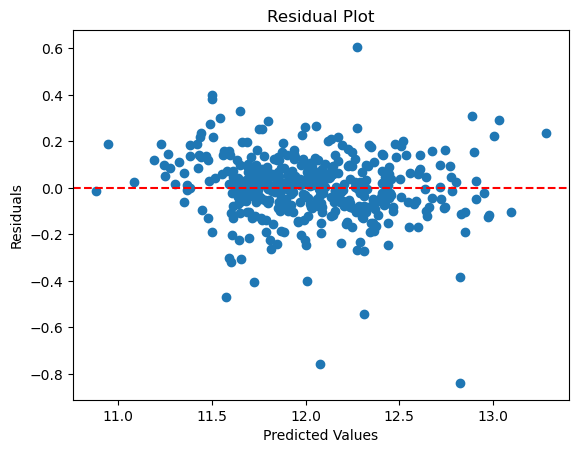

In [94]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

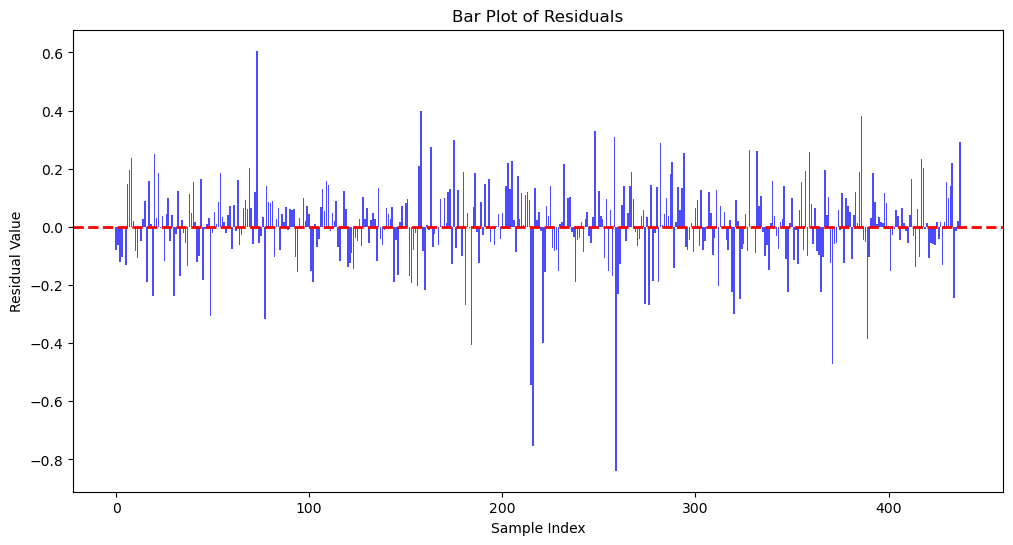

In [104]:
residuals = y_test - y_pred
import matplotlib.pyplot as plt
import numpy as np

# Sort residuals for better visualization
indices = np.arange(len(residuals))

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(indices, residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Add a reference line at 0
plt.title("Bar Plot of Residuals")
plt.xlabel("Sample Index")
plt.ylabel("Residual Value")
plt.show()


In [96]:
x_test=pd.read_csv('Downloads/House_pred_test.csv')

In [98]:
x_test

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan
0,0,1,0.000000,0.5,0.593445,0.566360,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.444444,0.625,0.384615,0.822581,0.0,0.0,1.00,1.00,0.0,0.000000,0.0,1.0,0.666667,0.0,1.0,0.0,0.0,0.116708,0.0,0.094364,0.126168,0.173111,1.0,0.333333,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.0,0.166667,1.0,0.00,0.000000,1.0,0.792994,0.333333,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.0,1.0,0.000000,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0.000000,1.0,0.598957,0.622527,1.0,1.0,0.5,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0,0.666667,0.555556,0.625,0.407692,0.870968,1.0,0.0,0.00,0.00,0.5,0.083721,0.0,1.0,0.666667,0.0,1.0,0.0,0.6,0.230175,1.0,0.000000,0.189720,0.260844,1.0,0.333333,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.000000,1.0,0.802548,0.333333,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.735294,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,0.235294,1.0,0.558854,0.614005,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.444444,0.500,0.107692,0.225806,0.0,0.0,1.00,1.00,0.0,0.000000,0.0,1.0,1.000000,0.5,1.0,0.0,1.0,0.197257,1.0,0.000000,0.064019,0.182139,1.0,0.666667,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.0,0.250000,1.0,0.25,0.666667,1.0,0.678344,1.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,0.235294,1.0,0.582212,0.524583,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.555556,0.625,0.100000,0.225806,0.0,0.0,1.00,1.00,0.5,0.015504,0.0,1.0,1.000000,0.0,1.0,0.0,1.0,0.150125,1.0,0.000000,0.151402,0.181747,1.0,1.000000,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,1.000000,1.0,0.675159,1.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.000000,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,0.588235,1.0,0.317987,0.335596,1.0,1.0,0.5,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.666667,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.50,0.50,0.0,0.000000,0.5,1.0,1.000000,0.5,1.0,0.0,0.6,0.065586,1.0,0.000000,0.475234,0.251227,1.0,1.000000,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.000000,1.0,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,1.0,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,1455,0.823529,0.0,0.000000,0.075426,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.000000,0.333333,0.750,0.284615,0.612903,0.0,0.0,0.75,0.75,0.0,0.000000,0.0,1.0,0.666667,0.0,1.0,0.0,0.8,0.000000,1.0,0.000000,0.255140,0.107164,1.0,0.666667,1.0,1.0,0.116257,0.293233,0.0,0.390532,0.000

In [100]:
x_test=x_test[selected_feat]

In [102]:
x_test

,MSZoning,LotShape,Condition1,BldgType,OverallQual,YearRemodAdd,RoofStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,PavedDrive
0,0.5,0.0,0.0,1.0,0.444444,0.822581,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.333333,1.0,0.312253,0.312253,0.000000,0.25,0.0,1.0,0.00,0.000000,1.0,0.333333,0.2,1.0,1.0
1,1.0,0.5,1.0,1.0,0.555556,0.870968,1.0,0.5,0.0,0.666667,0.0,1.0,0.0,0.333333,1.0,0.468253,0.468253,0.000000,0.25,0.5,1.0,0.00,0.000000,1.0,0.333333,0.2,1.0,1.0
2,1.0,0.5,1.0,1.0,0.444444,0.225806,0.0,0.0,0.0,1.000000,0.5,1.0,0.0,0.666667,1.0,0.326139,0.548792,0.000000,0.50,0.0,1.0,0.25,0.666667,1.0,1.000000,0.4,1.0,1.0
3,1.0,0.5,1.0,1.0,0.555556,0.225806,0.0,0.5,0.0,1.000000,0.0,1.0,0.0,1.000000,1.0,0.325285,0.542672,0.000000,0.50,0.5,1.0,0.25,1.000000,1.0,1.000000,0.4,1.0,1.0
4,1.0,0.5,1.0,0.0,0.777778,0.322581,0.0,0.0,0.5,1.000000,0.5,1.0,0.0,1.000000,1.0,0.453388,0.453388,0.000000,0.50,0.5,1.0,0.00,0.000000,1.0,0.666667,0.4,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,1.0,0.0,0.333333,0.612903,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.666667,1.0,0.116257,0.390532,0.000000,0.25,0.0,1.0,0.00,0.000000,0.5,0.000000,0.0,0.0,1.0
1455,0.0,0.0,1.0,0.0,0.333333,0.612903,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,0.333333,1.0,0.116257,0.390532,0.000000,0.25,0.0,1.0,0.00,0.000000,0.5,0.333333,0.2,1.0,1.0
1456,1.0,0.0,1.0,1.0,0.444444,0.193548,0.0,0.0,0.0,0.666667,0.0,1.0,0.0,1.000000,1.0,0.435686,0.435686,0.333333,0.25,0.0,1.0,0.25,0.666667,0.0,0.333333,0.4,1.0,1.0
1457,1.0,0.0,1.0,1.0,0.444444,0.258065,0.0,0.0,0.0,1.000000,0.5,1.0,1.0,0.333333,1.0,0.343654,0.343654,0.000000,0.25,0.0,1.0,0.00,0.000000,0.5,0.000000,0.0,0.0,1.0


In [106]:
Y_pred=rf.predict(x_test)

In [108]:
Y_pred

array([11.58192254, 11.84272149, 12.03988018, ..., 11.79953585,
       11.58229611, 12.30494906])